## Importing important libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek
from yellowbrick.classifier import roc_auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_curve,log_loss,roc_auc_score,confusion_matrix
import warnings
warnings.simplefilter('ignore')
from pprint import pprint
plt.style.use('fivethirtyeight')


## Reading the pre-processed data 

In [2]:
dataframe= pd.read_csv("D:/Project/Banking Term Deposit Prediction/preprocessed_data.csv")
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


In [3]:
dataframe.shape

(32950, 14)

## Preparing the training and test data 

In [4]:
# Predicators
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

In [5]:
# Dividing the data into train and test subsets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((26360, 13), (6590, 13), (26360,), (6590,))

In [6]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
0    23440
1     2920
Name: y, dtype: int64

 Distribution of classes of dependent variable in test :
0    5798
1     792
Name: y, dtype: int64


## Some Important Functions

In [7]:
###Checking the Scores

def check_scores(model, x_train, x_test):
  # Making predictions on train and test data

  train_class_preds = model.predict(x_train)
  test_class_preds = model.predict(x_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(x_train)[:,1]
  test_preds = model.predict_proba(x_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
   # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds)
  test_auc = roc_auc_score(y_test,test_preds)

  print('AUC on train data:', train_auc)
  print('AUC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(y_test, test_class_preds)
  precision = precision_score(y_test, test_class_preds)
  recall = recall_score(y_test, test_class_preds) 
  
  
  #R2 score on train and test data
  train_log = log_loss(y_train,train_preds)
  test_log = log_loss(y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F1 score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_class_preds)
  #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
  plt.plot(false_positive_rate, true_positive_rate)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC curve')
  plt.show()

  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log
  

### Getting the optimal model 

def grid_search(model, parameters, x_train, y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid= parameters,
                       cv = 5, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(x_train,y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model


##### Lets at first fit Logistic Regression to our data and check the accuracy of the model 

# 1. Logistic Regression

In [8]:
# Parameter grid for Logistic Regression
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_parameters = dict(solver=solvers,penalty=penalty,C=c_values)# define grid search

#finding the best model
lr_optimal_model = grid_search(LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0), lr_parameters, x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=1.0, penalty=l2, s

##### Getting the Scores

The accuracy on train dataset is 0.8915781487101669
The accuracy on test dataset is 0.8804248861911987

Train confusion matrix:
[[22943   497]
 [ 2361   559]]

Test confusion matrix:
[[5668  130]
 [ 658  134]]

AUC on train data: 0.8559728423488708
AUC on test data: 0.8441859740906826

Train log loss: 0.2576853823497013
Test log loss: 0.27787895159329523

F1 score is: 0.2537878787878788
Precision is: 0.5075757575757576
Recall is: 0.1691919191919192


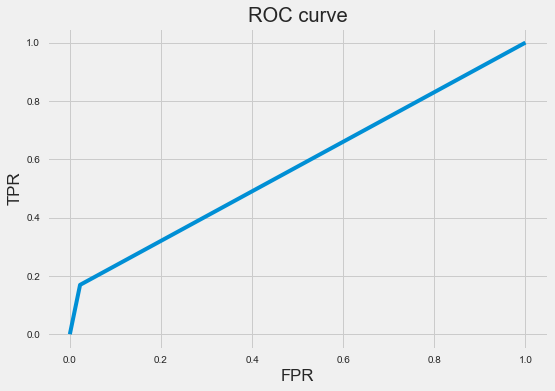

In [9]:
# Getting the scores for all the score metrics used here

lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall,lr_train_log, lr_test_log = check_scores(lr_optimal_model, x_train, x_test )

##### We could see that Logistic Regression is giving an accuracy of 0.89 on Training set and 0.88 on the Test set . Whereas the AUC Score on test data is 0.84 and log loss is 0.27.

#### Lets Check on Class imbalance and apply Logistic Regression and see whether there is an imporvement in the model accuracy .

 Accuracy is : 0.7793626707132019
Area Under the curve is : 0.8026651405083165


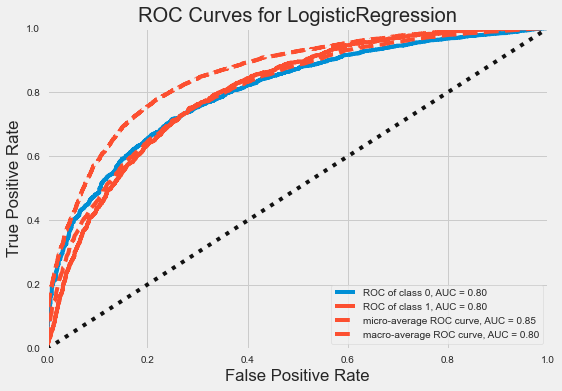

In [10]:
# A function to use smote
def grid_search_Logistic_Regression(dataframe,target):

    # splitting the data
    x_train,x_test,y_train,y_test = train_test_split(dataframe,target, test_size=0.3, random_state=42)

    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTETomek(random_state=42)
    
    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    
    lg = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'lbfgs')
    lg.fit(X_sm, y_sm)
    test_class_pred = lg.predict(x_test)
    test_preds = lg.predict_proba(x_test)[:,1]    
    print(" Accuracy is :", accuracy_score(y_test, test_class_pred))
    print("Area Under the curve is :" ,roc_auc_score(y_test,test_preds))
    visualizer = roc_auc(lg,X_sm,y_sm,x_test,y_test)


grid_search_Logistic_Regression(X,y)

##### Ohh!!! on applying SMOTE our model performance degraded for Logistic Regression , the accuracy degraded from 0.88 to 0.77 . Same happened with the area under the curve .

### With that , lets move towards the tree based models to check to any improvement .

# 2. Decision Tree Classifier 

In [11]:
# Run Decision Tree Classifier
dtcmodel = DecisionTreeClassifier(random_state=0)
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy'],
'min_samples_split' : [50,100,150],
'min_samples_leaf' : [40,50]
             }
# using grid search with respective parameters
dtc_optimal_model = grid_search(dtcmodel, param_grid,x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=100; t

### Getting the Scores

The accuracy on train dataset is 0.901176024279211
The accuracy on test dataset is 0.8904400606980273

Train confusion matrix:
[[22977   463]
 [ 2142   778]]

Test confusion matrix:
[[5674  124]
 [ 598  194]]

AUC on train data: 0.8831622928257514
AUC on test data: 0.8706100980484388

Train log loss: 0.23416332609172238
Test log loss: 0.2854424163782139

F1 score is: 0.34954954954954953
Precision is: 0.610062893081761
Recall is: 0.24494949494949494


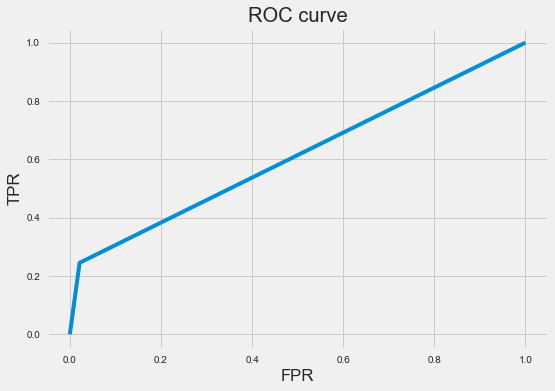

In [12]:
# Getting scores from all the metrices
dtc_model, dtc_train_auc, dtc_test_auc, dtc_train_accuracy, dtc_test_accuracy,dtc_f1, dtc_precision,dtc_recall,dtc_train_log, dtc_test_log = check_scores(dtc_optimal_model, x_train, x_test )

##### We can see an accuracy of 0.90 approx on the training set and 0.89 accuracy on the test set and an AUC Score of 0.87 and Log loss of 0.28 on the test set . From accuracy and AUC score we can say that Decision Tree is performing better than Logistic model but log loss value of Decision Tree is more than that of Logistic model for test data where we can say the performace of Decision Tree has degraded.
##### Lets fit a Random Forest to see how it performs .

# 3. Random Forest Classifier

In [13]:
# selecting the classifier
rfc = RandomForestClassifier(random_state=0)
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy'],
'n_estimators' : [50,80,100],
'min_samples_split' : [50,100,150],
'min_samples_leaf' : [40,50]
             }
# using grid search with respective parameters
rf_optimal_model = grid_search(rfc, param_grid,x_train,y_train)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=40, min_samples_split=50, n_estimators=80; tot

### Getting the Scores

The accuracy on train dataset is 0.9025796661608497
The accuracy on test dataset is 0.8943854324734446

Train confusion matrix:
[[23304   136]
 [ 2432   488]]

Test confusion matrix:
[[5765   33]
 [ 663  129]]

AUC on train data: 0.9206079935948385
AUC on test data: 0.9104233304065142

Train log loss: 0.22146033180031727
Test log loss: 0.23922069054113285

F1 score is: 0.27044025157232704
Precision is: 0.7962962962962963
Recall is: 0.16287878787878787


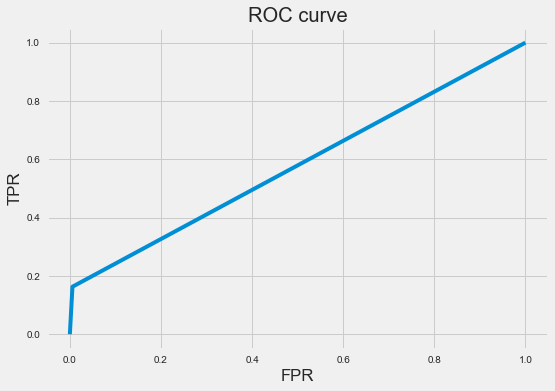

In [14]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, x_train, x_test )

##### Random Forest too gave the same accuracy of 0.89 on the test data as our Decision Tree Model but the area under the curve is more compared to the Decision tree of around 0.91 on the test data and the log loss is also 0.23 lower than our decison tree's log loss , so we can say there is slight imporvement in our model . Also it took a lot of time to train the model approx about an hour.

#### As we know our dataset has Imbalance class so lets check on Imbalance class and Implement Random Forest Classifier and check our model performance 


 Accuracy is : 0.7857359635811836
Area Under the curve is : 0.8560750921999194


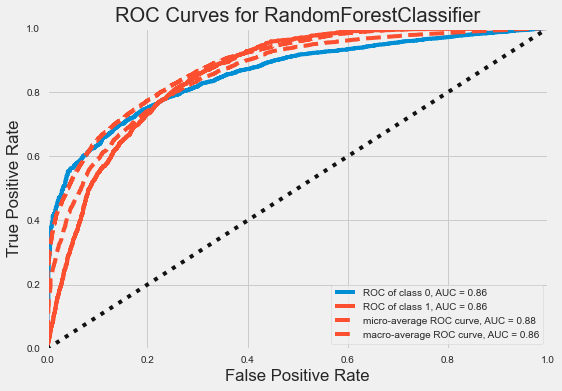

In [15]:
# A function to use smote
def grid_search_random_forrest_best(dataframe,target):

    # splitting the data
    x_train,x_test,y_train,y_test = train_test_split(dataframe,target, test_size=0.3, random_state=42)

    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTETomek(random_state=42)
    
    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    
    rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features='auto', min_samples_leaf= 40, min_samples_split= 50, n_estimators= 100,random_state=42)
    
    rfc.fit(X_sm, y_sm)
    test_class_pred = rfc.predict(x_test)
    test_preds = rfc.predict_proba(x_test)[:,1]    
    print(" Accuracy is :", accuracy_score(y_test, test_class_pred))
    print("Area Under the curve is :" ,roc_auc_score(y_test,test_preds))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_test,y_test)


grid_search_random_forrest_best(X,y)

##### Ohhh!!!! On applying Smote to check on imbalance classes , the accuracy of our model decreased :((

##### Now lets check for other algorithms too .

# 4. Gradient Boosting Machine


In [16]:
#finding the best model
gb_parameters ={
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1]
}

print(gb_parameters)

gb_optimal_model = grid_search(GradientBoostingClassifier(random_state=0), gb_parameters, x_train, y_train)

{'n_estimators': [5, 50, 250], 'max_depth': [1, 3, 5, 7], 'learning_rate': [0.01, 0.1, 1]}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_de

### Getting the Scores 


The accuracy on train dataset is 0.9145295902883156
The accuracy on test dataset is 0.8978755690440061

Train confusion matrix:
[[22890   550]
 [ 1703  1217]]

Test confusion matrix:
[[5614  184]
 [ 489  303]]

AUC on train data: 0.9358996446771705
AUC on test data: 0.9222179321674836

Train log loss: 0.18979123129455303
Test log loss: 0.21580336414280596

F1 score is: 0.473807662236122
Precision is: 0.62217659137577
Recall is: 0.38257575757575757


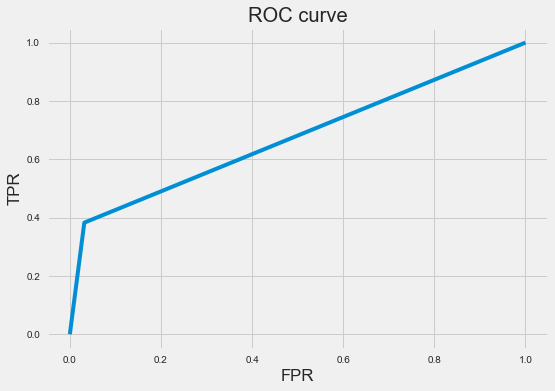

In [17]:
# Getting the scores for all the score metrics used here
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, x_train, x_test )

##### Gradient Boosting Machine shows more improvement in accuracy of the training set of 0.91 approx but the accuracy on the Test set was still the same of about 0.897 approx and the AUC Score is 0.92 and Log loss is 0.21 on the test data which is better than the other Models. Its also took a lot of time to train .

#### Now lets fit the Max Voting Classifier with the above models to see if there is any imporvement .

# 5. Max Voting Classifier Model

In [18]:
# Appending all the models to estimators list
estimators = []

estimators.append(('logistic', lr_optimal_model))
estimators.append(('dtc', dtc_optimal_model))
estimators.append(('GB', gb_optimal_model))
estimators.append(('rf', rf_optimal_model))

# create the voting model
voting_model = VotingClassifier(estimators, voting='soft')

voting_model.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=0.01, max_iter=10000,
                                                 random_state=0)),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features='auto',
                                                     min_samples_leaf=50,
                                                     min_samples_split=50,
                                                     random_state=0)),
                             ('GB',
                              GradientBoostingClassifier(n_estimators=250,
                                                         random_state=0)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features='auto',
                                                     min_samples_leaf=40,
                                                     min_samples_split=50,
                                                     random_state=0))],
                 voting='soft')

#### Getting the Scores

The accuracy on train dataset is 0.9056525037936267
The accuracy on test dataset is 0.8954476479514416

Train confusion matrix:
[[23244   196]
 [ 2291   629]]

Test confusion matrix:
[[5736   62]
 [ 627  165]]

AUC on train data: 0.923434957805414
AUC on test data: 0.9117615226079352

Train log loss: 0.21290211248522245
Test log loss: 0.23158594462444854

F1 score is: 0.32384690873405303
Precision is: 0.7268722466960352
Recall is: 0.20833333333333334


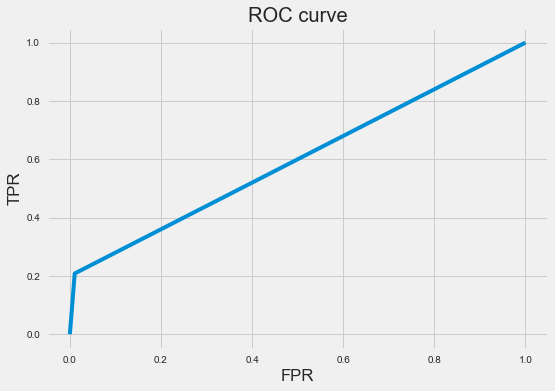

In [19]:
# Getting all the scores and errors
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall, voting_train_log, voting_test_log = check_scores(voting_model, x_train, x_test )

#### I think this is the ultimate accuracy what we can acheive as there is no improvement in the accuracy . Voting Classifier too gave the same result as Random forest with an accuracy of 0.89 , AUC Score of 0.91 and Log loss of 0.23 on the test data .

#### Lets built a Stacked model with Random Forest as the meta class and logistic , decision tree and gradient boosting as our base class .

# 6. Stacking Model

In [20]:
#Building a stacked classifier
stacked_classifier = StackingClassifier(classifiers =[lr_optimal_model, gb_optimal_model, dtc_optimal_model],
                                             meta_classifier = RandomForestClassifier(), 
                                             use_probas = True, 
                                             use_features_in_secondary = True)

# training of stacked model
stacked_model = stacked_classifier.fit(x_train, y_train) 

#### Getting The Scores

The accuracy on train dataset is 0.9994688922610016
The accuracy on test dataset is 0.8974203338391502

Train confusion matrix:
[[23434     6]
 [    8  2912]]

Test confusion matrix:
[[5561  237]
 [ 439  353]]

AUC on train data: 0.9999987142923933
AUC on test data: 0.9137467073285458

Train log loss: 0.049464216222726676
Test log loss: 0.29096919373325486

F1 score is: 0.5108538350217077
Precision is: 0.5983050847457627
Recall is: 0.4457070707070707


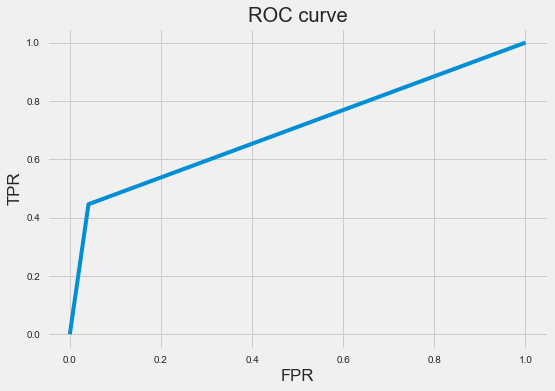

In [21]:
stacked_model, stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_f1, stacked_precision, stacked_recall, stacked_train_log, stacked_test_log = check_scores(stacked_model, x_train, x_test )

##### Stacked model gave a 0.99 or 99 % accuracy on the traing set but 0.89 accuracy on the test set , and an AUC Score of 0.99 on training set whereas 0.91 on the test set and a log loss of 0.04 on training data and 0.29 log loss on the test data . We can consider that as overfitting model for our data .

# Model Evaluation 

### <u>Model and their Accuracy</u>

##### Speed Scores (time taken to train the model) :-  1, 2, 3, 4, 5, 6, 7 (Lower is better)
##### Performance Scores (based on Test Accuracy,AUC Score & Log-Loss): 1, 2, 3, 4, 5, 6, 7 (Lower is better)
##### Final score : Performance Score (append) Speed score.


In [29]:
# Making a dataframe of all the scores for every model
scores_ = [("Random Forest", rf_train_accuracy, rf_test_accuracy,rf_test_auc,rf_test_log,'3','5','35'),
("Decision Tree",dtc_train_accuracy,dtc_test_accuracy,dtc_test_auc,dtc_test_log,'4','1','41'),
("Gradient Boosting",  gb_train_accuracy, gb_test_accuracy,gb_test_auc,gb_test_log,'1','4','14'),
("Logistic Regression", lr_train_accuracy, lr_test_accuracy,lr_test_auc,lr_test_log,'5','1','51'),
("Voting Classifier", voting_train_accuracy, voting_test_accuracy,voting_test_auc,voting_test_log,'2','2','22'),
("Stacked Model", stacked_train_accuracy, stacked_test_accuracy,stacked_test_auc,stacked_test_log,'3','3','33')]

Scores_ =pd.DataFrame(data = scores_, columns=['Model Name','Train Accuracy','Test Accuracy','Test Auc Score','Test Log Loss','Performance Score','Speed Score','Final Score'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy,Test Auc Score,Test Log Loss,Performance Score,Speed Score,Final Score
Model Name,,,,,,,
Random Forest,0.902580,0.894385,0.910423,0.239221,3,5,35
Decision Tree,0.901176,0.890440,0.870610,0.285442,4,1,41
Gradient Boosting,0.914530,0.897876,0.922218,0.215803,1,4,14
Logistic Regression,0.891578,0.880425,0.844186,0.277879,5,1,51
Voting Classifier,0.905653,0.895448,0.911762,0.231586,2,2,22
Stacked Model,0.999469,0.897420,0.913747,0.290969,3,3,33


In [23]:
print('Model Ranks according to their speed and performance :')
print('1. Gradient Boosting Machine')
print('2. Voting Classifier')
print('3. Stacked Model')
print('4. Random Forest')
print('5. Decision Tree')
print('6. Logistic Regression')

Model Ranks according to their speed and performance :
1. Gradient Boosting Machine
2. Voting Classifier
3. Stacked Model
4. Random Forest
5. Decision Tree
6. Logistic Regression


#### So based ont the accuracy ,AUC Score and Log-Loss on the test data and the speed of the model to train the data we calculatd the final score from where we can say Gradient Boosting Machine is our best model .

### For the final part of this section, I am going to check variable importance for  different Models to get an idea of important variables.

In [24]:
## Getting Important features for Random Forest
rf_model.feature_importances_
feature_importance = rf_model.feature_importances_
features=X.columns
forest_importance = pd.Series(feature_importance , index = features)

## Getting Impoortant features for Decision Tree
dtc_importance= dtc_model.feature_importances_
features=X.columns
dtc_importances = pd.Series(dtc_importance , index = features)

## Getting Important Features for Logistic Regression
lr_coefficients=lr_optimal_model.coef_
lr_coefficients=lr_coefficients.reshape(-1)
lr_coefficients.shape
features=X.columns
coeffs_logistic_model = pd.Series(lr_coefficients, index=features)

## Getting Important Features for Gradient Boosting Machine
gb_importance= gb_model.feature_importances_
features=X.columns
gb_importances = pd.Series(gb_importance , index = features)


Text(0, 0.5, 'Feature Importance')

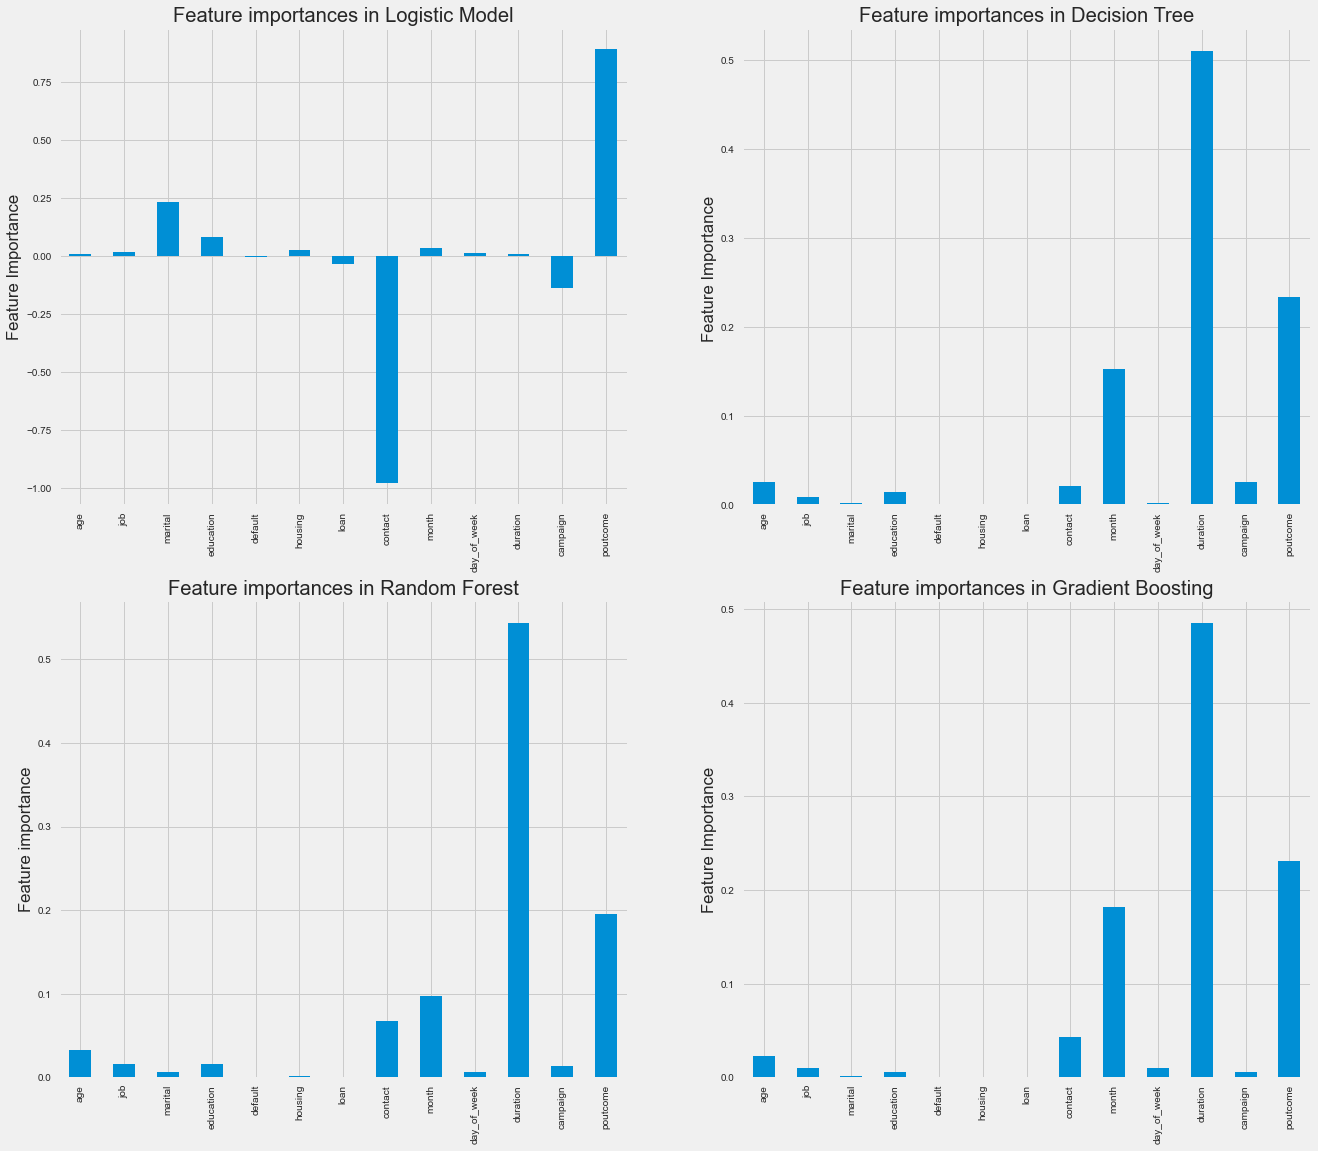

In [25]:
plt.figure(figsize=(20,18))

plt.subplot(2,2,1)
# Plotting feature importance for Linear Model
coeffs_logistic_model.plot.bar()
plt.title("Feature importances in Logistic Model")
plt.ylabel("Feature Importance")

plt.subplot(2,2,2)
# Plotting feature importance for Decision Tree
dtc_importances.plot.bar()
plt.title("Feature importances in Decision Tree")
plt.ylabel("Feature Importance ")

plt.subplot(2,2,3)
# Plotting feature importance for Random Forest
forest_importance.plot.bar()
plt.title("Feature importances in Random Forest")
plt.ylabel("Feature importance")

plt.subplot(2,2,4)
# Plotting feature importance for Gradient boosting
gb_importances.plot.bar()
plt.title("Feature importances in Gradient Boosting")
plt.ylabel("Feature Importance")

#### Now this is a pretty interesting feature . Here we can see that in all the tree based models duration is given  as the most important feature following by poutcome and months , whereas in logistic regression we can see that the feature duration is not given any importance rather poutcome is the most important feature for logistic model and loan , contact and campaign is bring down the model accuracy. This might be the reason that logistic model is not performing so good .

# Final Verdict :

#### **1. Important Variables :** 
When Tree based model uses only duration, poutcome and month , it gave a pretty good accuracy on the test data. But when Logistic Regression uses poutcome and maritial as its important feature , but the model couldn't get to a high accuracy.

#### **2. Best Model :** 
Gradient Boosting Machine is the best choice here. If anyone has the resources to consume that much time, the model will predict that the person will subscribe term deposite with 0.897 accuracy or almost 90% accuracy.

#### **3. Challenges faced :**
I am listing some challenges faced by me :
*   Huge data size.
*   Needed to impute many missing values which were present in the data.
*   There were many Outliers present which i needed to remove.
*   Too much training time for black box models.

#### **4. Final Words :**
With a pretty OK accuracy we predict that whether the client will subscribe to the Term Deposit . A client with longer duration is more likely to subscirbe to the term deposit .
So the bank will get to know about which customer will subscribe to their term deposit and thereby can invest in higher gain financial products to make a profit.



